### **PROJES JALAN 'REKOMENDASI LAGU BERDASARKAN CERITA USER'**

**USER** DAPAT INPUT CERITA PENDEK

In [ ]:
inpuut = input('masukkan cerita anda: ')
inpuut

**--------------------- TAHAP PREPROCESSING INPUT USER --------------------**

1. LOWER CASING DAN REMOVAL PUNCTUATION

In [ ]:
import string

data1 = inpuut

# Fungsi untuk membersihkan teks
def clean_lyrics(lyrics):
    if isinstance(lyrics, str):
        lyrics = lyrics.lower()
        lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    return lyrics

# Membersihkan string langsung
input_clean1 = clean_lyrics(data1)
input_clean1

print('sebelum :', data1)
print('sesudah :', input_clean1)

# output_path = 'Data Cleaned 2.csv'
# data.to_csv(output_path, index=False)


sebelum : yen aku Saiky emang Lagi mikir ne de e seng ayu dewe, tapi Mbuh kok iso arak ee Seeng karo wong liyo
sesudah : yen aku saiky emang lagi mikir ne de e seng ayu dewe tapi mbuh kok iso arak ee seeng karo wong liyo


2. SPELLING CORRECTION

In [ ]:
from spellchecker import SpellChecker

# Membuat kamus bahasa Jawa tanpa "melu"
def create_javanese_dictionary():
    return {
        'aku', 'nduwe', 'klambi', 'mergo', 'ing', 'kene', 'ning', 'pindhah', 'macak', 'kudu', 'gelem',
        'wis', 'durung', 'ora', 'ngelmu', 'ngomong', 'sinau', 'ra', 'bisa', 'wong', 'pinter',
        'nganti', 'tangi', 'ning', 'kepengin', 'lungo', 'ngisor', 'ndhuwur', 'tuku', 'mbayar',
        'mangan', 'turu', 'gawe', 'butuh', 'gawean', 'ngajak', 'suwun', 'nonton', 'cerita',
        'waca', 'ngerti', 'sinau', 'golek', 'nyobi', 'ndelok', 'karo', 'dhisik', 'sepi', 'ramai',
        'sakjane', 'pengen', 'gak', 'ati', 'loro', 'nglarani', 'kesepian', 'lara', 'kok',
        'iso', 'kangen', 'kowe', 'pegat', 'pedot', 'lagi', 'lagek', 'ne', 'yen', 'liyo', 'sing',
        'ayu', 'dewe', 'mbuh', 'tapi', 'karo', 'uwong','dek', 'saiki', 'seneng', 'arek'
    }

def correct_spelling(sentence):
    # Inisialisasi SpellChecker dengan kamus kustom
    spell = SpellChecker(language=None)  # Tidak menggunakan kamus standar, menggunakan kamus kustom
    spell.word_frequency.load_words(create_javanese_dictionary())  # Memuat kamus bahasa Jawa

    # Memecah kalimat menjadi kata-kata
    words = sentence.split()
    corrected_words = []

    for word in words:
        # Jika kata ada di kamus, gunakan kata tersebut
        if word in create_javanese_dictionary():
            corrected_words.append(word)
        else:
            # Jika kata tidak ada di kamus, gunakan koreksi ejaan
            corrected_word = spell.correction(word)
            # Jika koreksi ada dan tidak None, gunakan koreksi kata
            if corrected_word and corrected_word != word:
                corrected_words.append(corrected_word)
            else:
                # Jika tidak ada koreksi yang tepat atau koreksi None, biarkan kata tetap
                corrected_words.append(word)

    # Gabungkan kata-kata yang sudah diperbaiki menjadi kalimat
    corrected_sentence = ' '.join(corrected_words)
    return corrected_sentence

data2 = input_clean1
input_clean2 = correct_spelling(data2)
print('sebelum: ', data2)
print('sesudah: ', input_clean2)


sebelum:  yen aku saiky emang lagi mikir ne de e seng ayu dewe tapi mbuh kok iso arak ee seeng karo wong liyo
sesudah:  yen aku saiki emang lagi mikir ne dek ne sing ayu dewe tapi mbuh kok iso arek ne seneng karo wong liyo


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.7 MB/s eta 0:00:00


3. REMOVAL STOPWORDS

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Custom stopwords for Javanese
javanese_stopwords = [
    'lan', 'ing', 'kang', 'saka', 'nggo', 'yen', 'iku', 'iki', 'ora',
    'kanggo', 'aku', 'koe', 'dhewe', 'sing', 'kita', 'sawise', 'sadurunge',
    'lagi','mbuh','ne', 'karo', 'ambek'
]

# Function to remove stopwords
def remove_stopwords(text, stopwords):
    try:
        tokens = word_tokenize(text)  # Tokenize text
        filtered_tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
        return ' '.join(filtered_tokens)
    except Exception as e:
        print("Error during stopwords removal:", str(e))
        return text  # Return original text if error occurs

nltk.download('punkt_tab')

data3 = input_clean2
input_clean3 = remove_stopwords(data3, javanese_stopwords)

print("sebelum:", data3)
print("sesudah:", input_clean3)


sebelum: yen aku saiki emang lagi mikir ne dek ne sing ayu dewe tapi mbuh kok iso arek ne seneng karo wong liyo
sesudah: saiki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


4. STEAMING

In [ ]:
def steam_javanese(word):
    # Daftar imbuhan
    prefixes = ['ng', 'di', 'ke', 'sa', 'se']
    infixes = ['um', 'in']  # Sisipan
    suffixes = ['an', 'e', 'no']

    original_word = word  # Menyimpan kata asli untuk validasi

    # Step 1: Hapus awalan
    for prefix in prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break

    # Step 2: Hapus sisipan
    for infix in infixes:
        if infix in word:
            word = word.replace(infix, '', 1)  # Hapus hanya kemunculan pertama
            break

    # Step 3: Hapus akhiran
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break

    # Validasi: Pastikan kata hasil tidak terlalu pendek
    if len(word) < 3:  # Jika hasil pemotongan terlalu pendek, gunakan kata asli
        return original_word

    return word

data4 = input_clean3
input_clean4 = steam_javanese(data4)
print('sebelum :', data4)
print('sesudah :', input_clean4)


sebelum : saiki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo
sesudah : iki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo


5. NUMBER TO WORD

In [ ]:
import re

def number_to_word_jawa(number):
    # Kamus angka dalam bahasa Jawa
    angka_jawa = {
        0: 'nol', 1: 'siji', 2: 'loro', 3: 'telu', 4: 'papat', 5: 'lima',
        6: 'enem', 7: 'pitu', 8: 'wolu', 9: 'sanga', 10: 'sepuluh',
        11: 'sewelas', 12: 'duwelas', 13: 'telu welas', 14: 'papat welas',
        15: 'limolas', 16: 'nem belas', 17: 'pitu belas', 18: 'wolu belas',
        19: 'sanga belas', 20: 'rolas', 30: 'tigalase', 40: 'patang puluh',
        50: 'lima puluh', 60: 'enem puluh', 70: 'pitu puluh', 80: 'wolu puluh',
        90: 'sanga puluh', 100: 'atus', 1000: 'ewu'
    }

    # Fungsi untuk mengubah angka menjadi kata
    if number in angka_jawa:
        return angka_jawa[number]

    # Jika angka lebih besar dari 20, kita pecah berdasarkan puluhan dan satuannya
    if number < 100:
        puluhan = number // 10 * 10
        sisa = number % 10
        if sisa == 0:
            return angka_jawa[puluhan]
        else:
            return f"{angka_jawa[puluhan]} {angka_jawa[sisa]}"

    # Jika lebih dari 100, kita tangani dengan penggabungan ribuan atau ratusan
    if number >= 100:
        ratusan = number // 100 * 100
        sisa = number % 100
        if sisa == 0:
            return f"{angka_jawa[ratusan]}"
        else:
            return f"{angka_jawa[ratusan]} {number_to_word_jawa(sisa)}"

# Fungsi untuk mengonversi angka dalam kalimat
def convert_numbers_in_sentence(sentence):
    # Cari semua angka dalam kalimat
    words = sentence.split()
    for i in range(len(words)):
        # Periksa apakah kata tersebut adalah angka
        if words[i].isdigit():
            num = int(words[i])
            # Ganti angka dengan kata bahasa Jawa
            words[i] = number_to_word_jawa(num)

    # Gabungkan kembali kalimat dengan angka yang sudah diubah menjadi kata
    return ' '.join(words)

data5 = input_clean4
input_clean5 = convert_numbers_in_sentence(data5)

print('sebelum :', data5)
print('sesudah :', input_clean5)


sebelum : iki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo
sesudah : iki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo


**================= INI TERBARU FEATURE ENGGENERING UNTUK USER ======================**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np
import pickle


In [ ]:
# Transformasi input user ke dalam vektor TF-IDF
processed_input =  'iki emang mikir dek ayu dewe tapi kok iso arek seneng wong liyo'

# Load TF-IDF Vectorizer dan representasi numerik
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)
user_tfidf = tfidf_vectorizer.transform([processed_input])

# Load BoW Vectorizer dan representasi numerik
with open('bow_vectorizer.pkl', 'rb') as f:
    bow_vectorizer = pickle.load(f)
user_bow = bow_vectorizer.transform([processed_input])

# Load Word2Vec Model dan representasi numerik
word2vec_model = Word2Vec.load('word2vec_model.model')
def get_word2vec_representation(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

user_word2vec = get_word2vec_representation(processed_input, word2vec_model)



In [ ]:
# Load model K-Means
with open('kmeans_tfidf_model.pkl', 'rb') as f:
    kmeans_tfidf = pickle.load(f)
with open('kmeans_bow_model.pkl', 'rb') as f:
    kmeans_bow = pickle.load(f)
with open('kmeans_word2vec_model.pkl', 'rb') as f:
    kmeans_word2vec = pickle.load(f)
print(kmeans_word2vec.cluster_centers_.dtype)

# Tentukan cluster input user
cluster_tfidf = kmeans_tfidf.predict(user_tfidf)
cluster_bow = kmeans_bow.predict(user_bow)
user_word2vec1 = np.reshape(user_word2vec, (1, -1)).astype(np.float32)  # Mengubah menjadi 2 dimensi (1, dimensi_fitur)

# Tentukan cluster input user menggunakan Word2Vec
cluster_word2vec = kmeans_word2vec.predict(user_word2vec1)

print(f"Cluster TF-IDF: {cluster_tfidf[0]}")
print(f"Cluster BoW: {cluster_bow[0]}")
print(f"Cluster Word2Vec: {cluster_word2vec[0]}")


float32
Cluster TF-IDF: 0
Cluster BoW: 0
Cluster Word2Vec: 0


CARI LAGU DALAM CLUSTER YANG SAMA

In [ ]:
# Load dataset dengan informasi cluster
df = pd.read_csv('CLUSTERED_LAGU_BAHASA_JAWA.csv')

# Filter lagu berdasarkan cluster TF-IDF
recommended_songs_tfidf = df[df['cluster_tfidf'] == cluster_tfidf[0]]

# Filter lagu berdasarkan cluster BoW
recommended_songs_bow = df[df['cluster_bow'] == cluster_bow[0]]

# Filter lagu berdasarkan cluster Word2Vec
recommended_songs_word2vec = df[df['cluster_word2vec'] == cluster_word2vec[0]]

print("Rekomendasi Lagu Berdasarkan TF-IDF:")
print(recommended_songs_tfidf[['Judul Lagu', 'Lirik']])

print("\nRekomendasi Lagu Berdasarkan BoW:")
print(recommended_songs_bow[['Judul Lagu', 'Lirik']])

print("\nRekomendasi Lagu Berdasarkan Word2Vec:")
print(recommended_songs_word2vec[['Judul Lagu', 'Lirik']])


Rekomendasi Lagu Berdasarkan TF-IDF:
                                           Judul Lagu  \
0                        Suci Tacik – Damar Opo Lilin   
5                         Syahiba Saufa – Konco Mesra   
6                       Shinta Gisul – Selendang Biru   
9           Vita Alvia – Lamunan (feat. Ajeng Febria)   
10                        Era Syaqira – Kalih Welasku   
...                                               ...   
2929                               Nadya – Pacar Lama   
2931                            Rindi Antika – Lewung   
2934                           Yowis Ben – Lagu Galau   
2935  Wandra – Adik Berjilbab Ungu (feat. Jihan Audy)   
2937                Reny Farida – Gandrung Blambangan   

                                                  Lirik  
0     damar lil buyar kaw nyawang tekad riko kurang ...  
5     wang sorot mripatmu jan ku erti ono ati sliram...  
6     kow njalok lebih mendg aku seng aleh uwes mati...  
9     pdha mudra pasang tanpa wangen tresnaku 

REKOMENDASI BERDASARKAN KEMIRIPAN

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung kemiripan dengan TF-IDF
similarity_tfidf = cosine_similarity(user_tfidf, tfidf_vectorizer.transform(recommended_songs_tfidf['Lirik']))
recommended_songs_tfidf['similarity'] = similarity_tfidf[0]
top_tfidf = recommended_songs_tfidf.sort_values(by='similarity', ascending=False).head(5)

# Hitung kemiripan dengan BoW
similarity_bow = cosine_similarity(user_bow, bow_vectorizer.transform(recommended_songs_bow['Lirik']))
recommended_songs_bow['similarity'] = similarity_bow[0]
top_bow = recommended_songs_bow.sort_values(by='similarity', ascending=False).head(5)

# Hitung kemiripan dengan Word2Vec
# similarity_word2vec = cosine_similarity([user_word2vec], X_word2vec[recommended_songs_word2vec.index])
similarity_word2vec = cosine_similarity([user_word2vec], X_word2vec[recommended_songs_word2vec.index])
recommended_songs_word2vec['similarity'] = similarity_word2vec[0]
top_word2vec = recommended_songs_word2vec.sort_values(by='similarity', ascending=False).head(5)

print("Top Rekomendasi TF-IDF:")
print(top_tfidf[['Judul Lagu', 'similarity']])

print("\nTop Rekomendasi BoW:")
print(top_bow[['Judul Lagu', 'similarity']])

print("\nTop Rekomendasi Word2Vec:")
print(top_word2vec[['Judul Lagu', 'similarity']])


<ipython-input-61-caceb9bde095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_songs_tfidf['similarity'] = similarity_tfidf[0]
<ipython-input-61-caceb9bde095>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_songs_bow['similarity'] = similarity_bow[0]
<ipython-input-61-caceb9bde095>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Top Rekomendasi TF-IDF:
                                             Judul Lagu  similarity
1298  Denny Caknan – Bojo Loro (feat. Happy Asmara &...    0.174153
1063       Erlangga X Esa Risty X Damara De – Bojo Loro    0.155866
1852                       Intan Chacha – Mboh Ra Mikir    0.149186
171                    Niken Salindry – Jejantung Atiku    0.112986
2934                             Yowis Ben – Lagu Galau    0.108326

Top Rekomendasi BoW:
                                             Judul Lagu  similarity
1298  Denny Caknan – Bojo Loro (feat. Happy Asmara &...    0.367366
2616               Nella Kharisma – Online (Ono Liyane)    0.334675
1063       Erlangga X Esa Risty X Damara De – Bojo Loro    0.332023
2314                             Eny Sagita – Dewe-Dewe    0.275815
2500                              Abah Lala – Dewe-Dewe    0.275815

Top Rekomendasi Word2Vec:
                                             Judul Lagu  similarity
614                       Pakdhe Baz – Rasa

### **SCRAPPING DATA DAN PROSES DATA**

SCRAPPING DATA

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

# Base URL untuk halaman pertama
base_url = "https://liriklaguindonesia.net/"

# Jumlah halaman terakhir yang ingin di-scrape (sesuaikan dengan jumlah halaman di situs)
last_page = 400

# List untuk menyimpan data lagu
all_songs = []
i = 1
# Loop melalui halaman-halaman berikutnya
for page in range(201, last_page + 1):
    url = f"{base_url}page/{page}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Mencari elemen <li class="post-preview ..."> untuk halaman berikutnya
        posts = soup.find_all('li', class_='post-preview')
        for post in posts:
            title_tag = post.find('a')
            if title_tag:
                song_title = title_tag.text.strip()
                song_link = title_tag['href']
                all_songs.append({"Judul": song_title, "Link": song_link})
                print(song_title, "judul "+str(i))
                i+=1
    else:
        print(f"Failed to fetch page {page}. Status code: {response.status_code}")

j = 1
# Ambil lirik untuk setiap lagu
for song in all_songs:
    response = requests.get(song['Link'])
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract title from <h2 class="title">
        title_tag = soup.find('h2', class_='title')
        if title_tag:
            song_title = title_tag.find('span').text.strip()  # Get the title from <span>
            song['Judul'] = song_title

        # Extract lirik from <blockquote> and <p>
        lirik_blockquote = soup.find('blockquote')
        lirik_paragraph = lirik_blockquote.find_all('p') if lirik_blockquote else []
        lirik = "\n".join([p.get_text(strip=False) for p in lirik_paragraph])
        lirik_dengan_spasi = lirik.replace("\n", " ")
        song['Lirik'] = lirik_dengan_spasi if lirik_dengan_spasi else "Lirik tidak ditemukan"
        print(lirik_dengan_spasi, "data "+str(j))
        j+=1
    else:
        song['Lirik'] = "Gagal mengambil lirik"

# Simpan data ke file CSV
csv_file = "daftar_lagu_dan_lirik2233.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Judul Lagu", "Link", "Lirik"])  # Header
    for song in all_songs:
        writer.writerow([song['Judul'], song['Link'], song['Lirik']])

print(f"Data berhasil disimpan ke {csv_file}")

**---------------- TAHAP PREPROSESING DATA -----------------**

1. MENGHAPUS TANGGAL PADA KOLOM JUDUL LAGU




In [ ]:
import re
import pandas as pd

def remove_date(title):
    return re.sub(r'\d{1,2} \w{3}', '', title).strip()

data = pd.read_csv('daftar_lagu_dan_lirik2233.csv')
data['Judul Lagu'] = data['Judul Lagu'].apply(remove_date)


output_path = 'Data_Preprosesing_1.csv'
data.to_csv(output_path, index=False)


2. HAPUS KOLOM LINK

In [ ]:
# Hapus kolom "Link"
data_1 = pd.read_csv('Data_Preprosesing_1.csv')
data = data.drop(columns=['Link'])

output_path = 'Data_Preprosesing_2.csv'
data.to_csv(output_path, index=False)

print(f"save to {output_path}")


3. LOWER CASS DAN REMOVAL PUNCTUATION

In [ ]:
import pandas as pd
import string

file_path = "Data_Preprosesing_2.csv"
data = pd.read_csv(file_path)

def clean_lyrics(lyrics):
    if isinstance(lyrics, str):
        lyrics = lyrics.lower()
        lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    return lyrics

data['Lirik'] = data['Lirik'].apply(clean_lyrics)

output_file = "Data_Preprosesing_3.csv"
data.to_csv(output_file, index=False)

print(f"save to {output_file}.")


4. HAPUS LAGU SELAIN LAGU JAWA

In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

df = pd.read_csv('Data_Preprosesing_3.csv')

javanese_keywords = ['golek', 'suwe', 'podo', 'kowe', 'gawe', 'terimo', 'neng', 'sampeyan',
                     'liyane', 'ngelarani','durung','tresno', 'kanggo','karo','krungu','piye',
                     'nemen','loro','sliramu','duwe','sanes','kudu','naliko']

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

def contains_javanese_keywords(text):
    text = text.lower()
    return any(keyword in text for keyword in javanese_keywords)

df['Lirik_Bahasa'] = df['Lirik'].apply(detect_language)

def is_indonesian_or_english(lang, text):
    if lang in ['id', 'en','es']:
        if contains_javanese_keywords(text):
            return False
        return True
    return False

df_filtered = df[~df.apply(lambda row: is_indonesian_or_english(row['Lirik_Bahasa'], row['Lirik']), axis=1)]

df_filtered.to_csv('Data_Preprosesing_4.csv', index=False, columns=['Judul Lagu', 'Lirik'])

print("File CSV baru telah dibuat dengan nama 'Data_Preprosesing_4.csv'.")

6. REMOVAL OF STOPWORDS

In [4]:
javanese_stopwords = ['iki', 'sing', 'ora', 'opo', 'kok', 'lan', 'ng', 'ing', 'kuwi', 'karo', 'ndek', 'ya', 'lan','tak','kang',
                      'ning','sak','kaliyan','utawi','nanging','apa maneh','lajeng','banjur','sebab','menawa','saumpama','yen',
                      'sadurunge','sauwise','ben','supaya','kanggo','dadine','kaya','malika','wes', 'saka', 'nggo','iku',
                      'koe', 'dhewe', 'kita', 'sawise', 'sadurunge',
                      'lagi','mbuh']

def remove_stopwords(text):
    words = str(text).lower().split()
    filtered_words = [word for word in words if word not in javanese_stopwords]
    return ' '.join(filtered_words)

javanese_songs = pd.read_csv('/content/Data Mentah.csv')
javanese_songs['Lirik'] = javanese_songs['Lirik'].apply(remove_stopwords)

output_path = 'Data_Preprosesing_6.csv'
javanese_songs.to_csv(output_path, index=False)

print(f"Lirik bahasa Jawa tanpa stopwords disimpan ke: {output_path}")


Lirik bahasa Jawa tanpa stopwords disimpan ke: Data_Preprosesing_6.csv


7. STEAMING

In [5]:
import pandas as pd

def steam_javanese(word):
    prefixes = ['ng', 'di', 'ke', 'sa', 'se']
    infixes = ['um', 'in']
    suffixes = ['an', 'e', 'no']

    original_word = word

    for prefix in prefixes:
        if word.startswith(prefix):
            word = word[len(prefix):]
            break

    for infix in infixes:
        if infix in word:
            word = word.replace(infix, '', 1)
            break

    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break

    if len(word) < 3:
        return original_word

    return word

def steam_javanese_sentence(sentence):
    return ' '.join([steam_javanese(word) for word in sentence.split()])

try:
    df = pd.read_csv('Data_Preprosesing_6.csv')
except FileNotFoundError:
    print("File 'data_dikoreksi.csv' tidak ditemukan. Periksa kembali lokasi file.")
    exit()

target_column = 'Lirik'

if target_column not in df.columns:
    print(f"Kolom '{target_column}' tidak ditemukan dalam dataset. Periksa kembali nama kolom.")
    exit()

df[target_column] = df[target_column].apply(
    lambda x: steam_javanese_sentence(x) if isinstance(x, str) else x
)

output_file = 'Data_Preprosesing_7.csv'
try:
    df.to_csv(output_file, index=False)
    print(f"Hasil telah disimpan ke {output_file}")
except Exception as e:
    print(f"Terjadi kesalahan saat menyimpan file: {e}")


Hasil telah disimpan ke Data_Preprosesing_7.csv


8. NUMBER TO WORD

In [6]:
import pandas as pd

def number_to_word_jawa(number):
    angka_jawa = {
        0: 'nol', 1: 'siji', 2: 'loro', 3: 'telu', 4: 'papat', 5: 'lima',
        6: 'enem', 7: 'pitu', 8: 'wolu', 9: 'sanga', 10: 'sepuluh',
        11: 'sewelas', 12: 'rolas', 13: 'telulas', 14: 'papat welas',
        15: 'limolas', 16: 'enem belas', 17: 'pitulas', 18: 'wolulas',
        19: 'sangalas', 20: 'rong puluh', 30: 'telung puluh', 40: 'patang puluh',
        50: 'lima puluh', 60: 'enem puluh', 70: 'pitu puluh', 80: 'wolu puluh',
        90: 'sangang puluh', 100: 'satus', 200: 'rong atus', 1000: 'sewu', 2000: 'rongewu',
        300: 'telungatus'
    }

    if number in angka_jawa:
        return angka_jawa[number]

    if number < 100:
        puluhan = number // 10 * 10
        sisa = number % 10
        if sisa == 0:
            return angka_jawa[puluhan]
        else:
            return f"{angka_jawa[puluhan]} {angka_jawa[sisa]}"

    if number >= 100:
        ratusan = number // 100 * 100
        sisa = number % 100
        if sisa == 0:
            return f"{angka_jawa[ratusan]}"
        else:
            return f"{angka_jawa[ratusan]} {number_to_word_jawa(sisa)}"

def convert_numbers_in_sentence(sentence):
    words = sentence.split()
    for i in range(len(words)):
        if words[i].isdigit():
            num = int(words[i])
            words[i] = number_to_word_jawa(num)
    return ' '.join(words)

df = pd.read_csv('Data_Preprosesing_7.csv')

target_column = 'Lirik'

df[target_column] = df[target_column].astype(str).apply(convert_numbers_in_sentence)

output_file = 'DATA_LAGU_BAHASA_JAWA.csv'
df.to_csv(output_file, index=False)

print(f"Hasil telah disimpan ke {output_file}")


Hasil telah disimpan ke DATA_LAGU_BAHASA_JAWA.csv


--------------------------------  FEATURE ENGGENERING -------------------------------

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import numpy as np
import pickle


In [7]:
# Load dataset hasil preprocessing
df = pd.read_csv('DATA_LAGU_BAHASA_JAWA.csv')

# Pastikan kolom 'processed_lyrics' berisi lirik yang sudah diproses
print(df.head())  # Menampilkan beberapa baris pertama


                                     Judul Lagu  \
0                  Suci Tacik – Damar Opo Lilin   
1                        Esa Risty – Kok Iso Yo   
2         Kalia Siska – Teteg Ati (feat. SKA86)   
3  Syahiba Saufa – Lemah Teles (feat. James AP)   
4                             Yeni Inka – Ginio   

                                               Lirik  
0  damar lil buyar kaw nyawang tekad riko kurang ...  
1  iso yo tegel yo lahku neng endi luputku wong r...  
2  pungkas srengeng sor atiku iseh roso spek mpet...  
3  jujur ati loro durung biso nompo nyata tandur ...  
4  aku kelingan sliramu medot tres gampang uwis l...  


TF-IDF

In [8]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Lirik'])

# Simpan TF-IDF Vectorizer untuk digunakan nanti
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print("TF-IDF selesai.")


TF-IDF selesai.


BAG OF WORD (BOW)

In [9]:
# BoW (Bag of Words) Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['Lirik'])

# Simpan BoW Vectorizer untuk digunakan nanti
with open('bow_vectorizer.pkl', 'wb') as f:
    pickle.dump(bow_vectorizer, f)

print("BoW selesai.")


BoW selesai.


WORD2VEC

In [10]:
# Tokenisasi setiap lirik lagu untuk Word2Vec
tokenized_lyrics = [text.split() for text in df['Lirik']]

# Melatih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_lyrics, vector_size=100, window=5, min_count=1, workers=4)

# Representasi rata-rata untuk setiap lagu berdasarkan Word2Vec
def get_word2vec_representation(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Terapkan untuk seluruh lirik lagu
X_word2vec = np.array([get_word2vec_representation(text, word2vec_model) for text in df['Lirik']])

# Simpan model Word2Vec
word2vec_model.save('word2vec_model.model')

print("Word2Vec selesai.")


Word2Vec selesai.


KLESTERING MENGGUNAKAN K-MEANS DARI 3 METODE FEATURE ENGGENERING

In [11]:
# Tentukan jumlah cluster
k = 3  # Sesuaikan jumlah cluster yang diinginkan

# K-Means untuk TF-IDF
kmeans_tfidf = KMeans(n_clusters=k, random_state=42)
kmeans_tfidf.fit(X_tfidf)
df['cluster_tfidf'] = kmeans_tfidf.labels_

# K-Means untuk BoW
kmeans_bow = KMeans(n_clusters=k, random_state=42)
kmeans_bow.fit(X_bow)
df['cluster_bow'] = kmeans_bow.labels_

# K-Means untuk Word2Vec
kmeans_word2vec = KMeans(n_clusters=k, random_state=42)
kmeans_word2vec.fit(X_word2vec)
df['cluster_word2vec'] = kmeans_word2vec.labels_

# Simpan model K-Means untuk digunakan nanti
with open('kmeans_tfidf_model.pkl', 'wb') as f:
    pickle.dump(kmeans_tfidf, f)
with open('kmeans_bow_model.pkl', 'wb') as f:
    pickle.dump(kmeans_bow, f)
with open('kmeans_word2vec_model.pkl', 'wb') as f:
    pickle.dump(kmeans_word2vec, f)

print("Clustering selesai dan hasil cluster ditambahkan ke dataset.")


Clustering selesai dan hasil cluster ditambahkan ke dataset.


In [12]:
# Cek tipe data centroids model
print(kmeans_word2vec.cluster_centers_.dtype)

float32


In [13]:
# Simpan dataset dengan label cluster
df.to_csv('CLUSTERED_LAGU_BAHASA_JAWA.csv', index=False)

print("Dataset dengan label cluster berhasil disimpan.")


Dataset dengan label cluster berhasil disimpan.


Perbandingan menggunakan Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluasi clustering dengan Silhouette Score
sil_score_tfidf = silhouette_score(X_tfidf, kmeans_tfidf.labels_)
sil_score_bow = silhouette_score(X_bow, kmeans_bow.labels_)
sil_score_word2vec = silhouette_score(X_word2vec, kmeans_word2vec.labels_)

print(f"Silhouette Score TF-IDF: {sil_score_tfidf}")
print(f"Silhouette Score BoW: {sil_score_bow}")
print(f"Silhouette Score Word2Vec: {sil_score_word2vec}")


Silhouette Score TF-IDF: 0.027687041866520906
Silhouette Score BoW: 0.05555666193209197
Silhouette Score Word2Vec: 0.25656962394714355


# ***ANALISIS CLUSTER TF-IDF (DATA SET)***

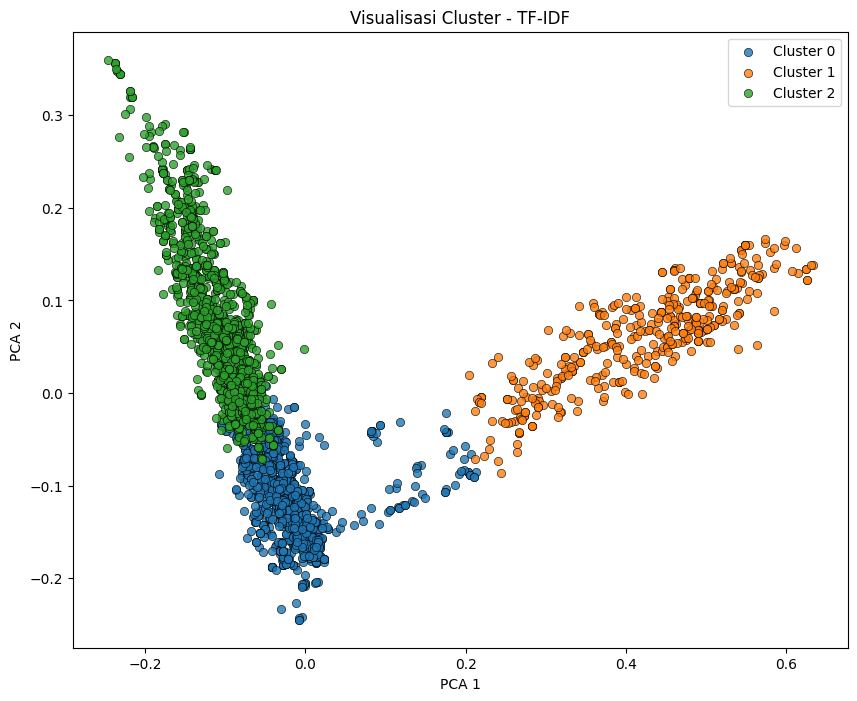

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Contoh untuk TF-IDF
pca = PCA(n_components=2)
X_tfidf_2d = pca.fit_transform(X_tfidf.toarray())

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
for cluster in range(k):  # k adalah jumlah cluster
    points = X_tfidf_2d[df['cluster_tfidf'] == cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}', edgecolors='black', linewidth=0.5, alpha=0.8)

plt.title("Visualisasi Cluster - TF-IDF")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


1. Cluster tf-idf

Top Words in Cluster 0 (TF-IDF): [('aku', 4713), ('ra', 2381), ('mung', 1923), ('ati', 1920), ('yang', 1778), ('dadi', 1483), ('neng', 1401), ('tres', 1300), ('ono', 1272), ('kow', 1247)]


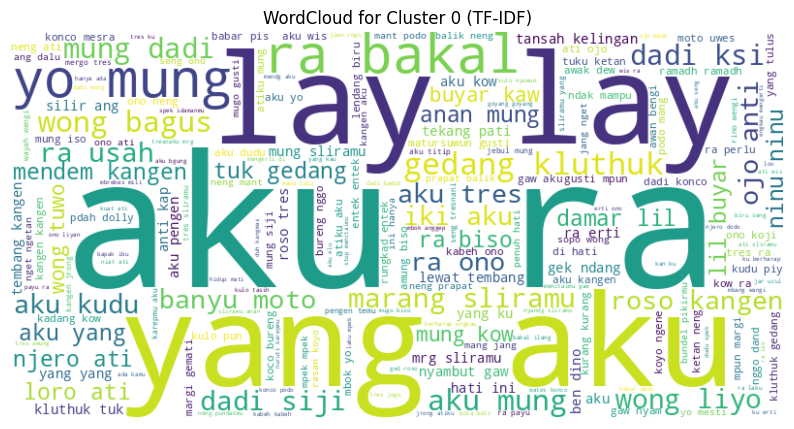

In [ ]:
#cluster 1

from collections import Counter
from wordcloud import WordCloud

cluster_0_indices = df[df['cluster_tfidf'] == 0].index
cluster_0_lyrics = " ".join(df.loc[cluster_0_indices, 'Lirik'])

# Hitung frekuensi kata
top_words = Counter(cluster_0_lyrics.split()).most_common(10)
print("Top Words in Cluster 0 (TF-IDF):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_0_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 0 (TF-IDF)")
plt.show()



Top Words in Cluster 1 (TF-IDF): [('riko', 3943), ('isun', 3100), ('sun', 2435), ('hang', 1955), ('welas', 1380), ('ati', 1378), ('biso', 974), ('nong', 933), ('mung', 815), ('roso', 781)]


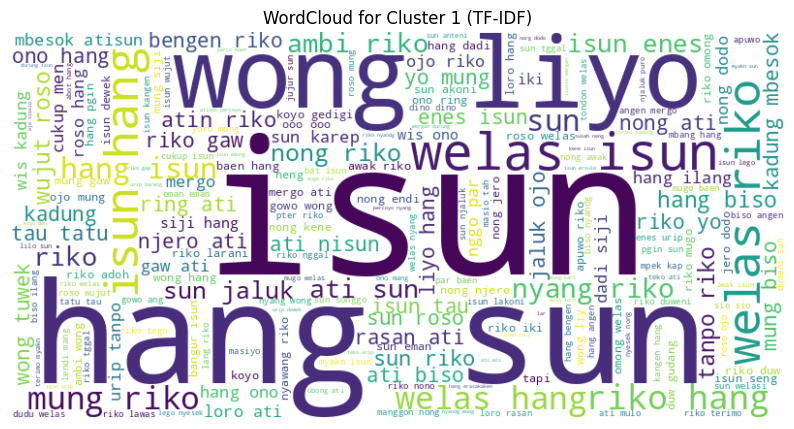

In [ ]:
from collections import Counter
from wordcloud import WordCloud

cluster_1_indices = df[df['cluster_tfidf'] == 1].index
cluster_1_lyrics = " ".join(df.loc[cluster_1_indices, 'Lirik'])

# Hitung frekuensi kata
top_words = Counter(cluster_1_lyrics.split()).most_common(10)
print("Top Words in Cluster 1 (TF-IDF):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_1_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 1 (TF-IDF)")
plt.show()



Top Words in Cluster 2 (TF-IDF): [('aku', 12342), ('kow', 7761), ('ra', 4150), ('ati', 3176), ('tres', 2581), ('mung', 2569), ('atiku', 2413), ('loro', 2220), ('neng', 2003), ('yang', 1859)]


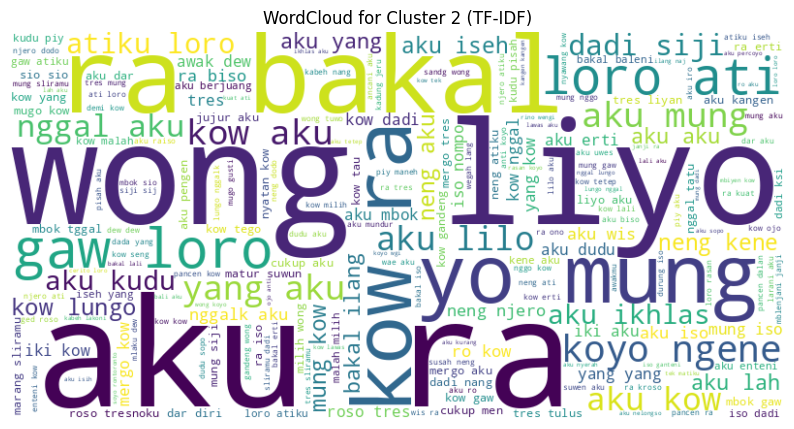

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Contoh untuk cluster 0 dengan TF-IDF
cluster_2_indices = df[df['cluster_tfidf'] == 2].index
cluster_2_lyrics = " ".join(df.loc[cluster_2_indices, 'Lirik'])

# Hitung frekuensi kata
top_words = Counter(cluster_2_lyrics.split()).most_common(10)
print("Top Words in Cluster 2 (TF-IDF):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 2 (TF-IDF)")
plt.show()



# ***ANALISIS CLUSTER word2vec (DATA SET)***

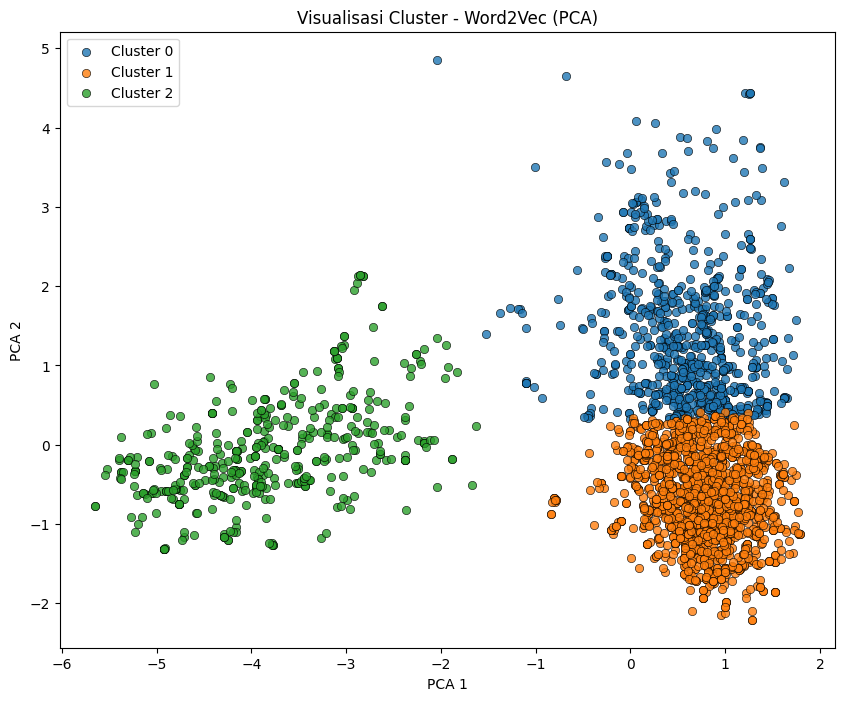

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality Reduction dengan PCA
pca = PCA(n_components=2)
X_word2vec_2d = pca.fit_transform(X_word2vec)

# Visualisasi hasil clustering Word2Vec
plt.figure(figsize=(10, 8))
for cluster in range(k):  # k adalah jumlah cluster
    points = X_word2vec_2d[df['cluster_word2vec'] == cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}', edgecolors='black', linewidth=0.5, alpha=0.8)

plt.title("Visualisasi Cluster - Word2Vec (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


WORDCLOUD CLUSTER WORD2VEC

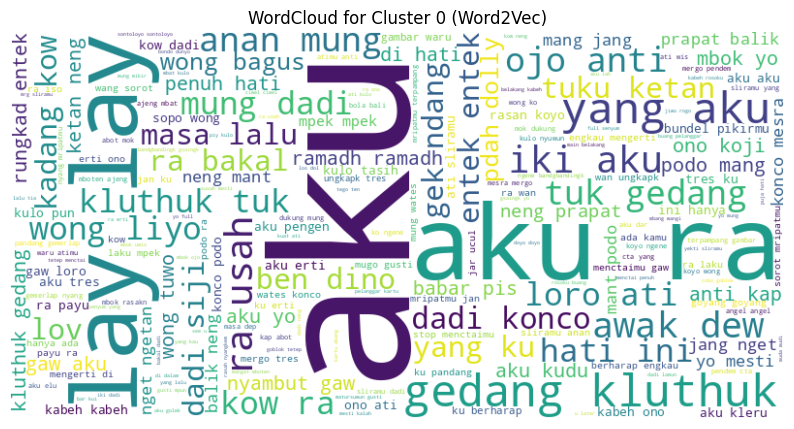

In [ ]:
from wordcloud import WordCloud

# Contoh untuk Cluster 0
cluster_0_indices = df[df['cluster_word2vec'] == 0].index
cluster_0_lyrics = " ".join(df.loc[cluster_0_indices, 'Lirik'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_0_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 0 (Word2Vec)")
plt.show()


Top Words in Cluster 1 (Word2Vec): [('aku', 12719), ('kow', 7769), ('ra', 4762), ('ati', 3927), ('mung', 3423), ('tres', 3194), ('atiku', 2847), ('neng', 2411), ('loro', 2362), ('sliramu', 2328)]


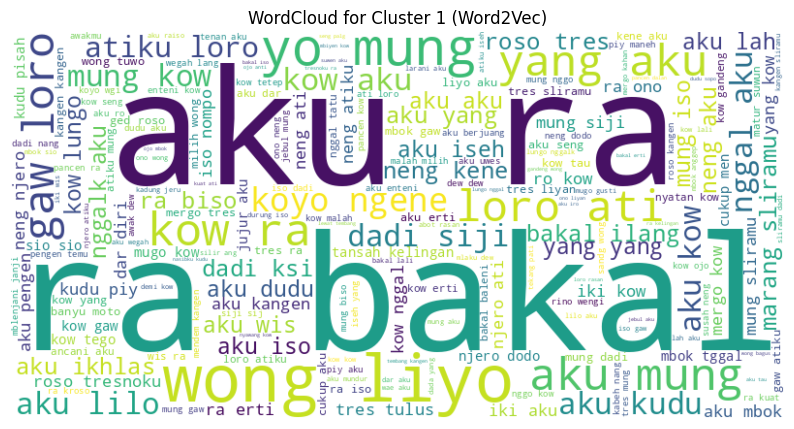

In [ ]:
from wordcloud import WordCloud

# Contoh untuk Cluster 0
cluster_1_indices = df[df['cluster_word2vec'] == 1].index
cluster_1_lyrics = " ".join(df.loc[cluster_1_indices, 'Lirik'])

top_words = Counter(cluster_1_lyrics.split()).most_common(10)
print("Top Words in Cluster 1 (Word2Vec):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_1_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 1 (Word2Vec)")
plt.show()


Top Words in Cluster 2 (Word2Vec): [('riko', 4091), ('isun', 3179), ('sun', 2544), ('hang', 2023), ('ati', 1520), ('welas', 1466), ('nong', 1027), ('biso', 1013), ('mung', 903), ('roso', 815)]


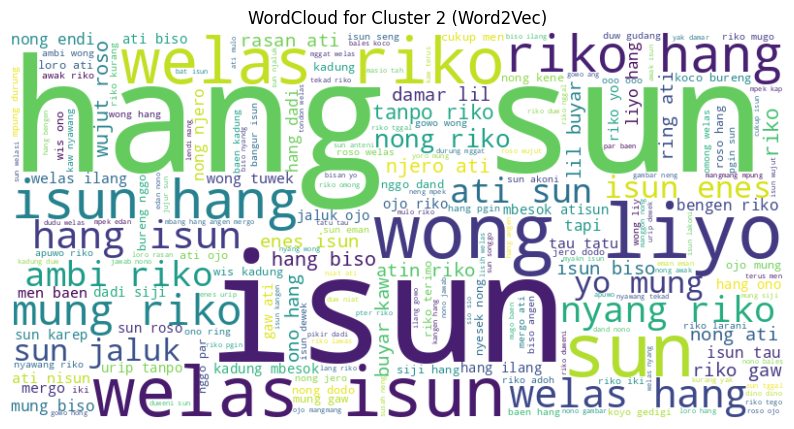

In [ ]:
from wordcloud import WordCloud

# Contoh untuk Cluster 0
cluster_2_indices = df[df['cluster_word2vec'] == 2].index
cluster_2_lyrics = " ".join(df.loc[cluster_2_indices, 'Lirik'])

top_words = Counter(cluster_2_lyrics.split()).most_common(10)
print("Top Words in Cluster 2 (Word2Vec):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 2 (Word2Vec)")
plt.show()


# ***ANALISIS CLUSTER BOW (DATA SET)***

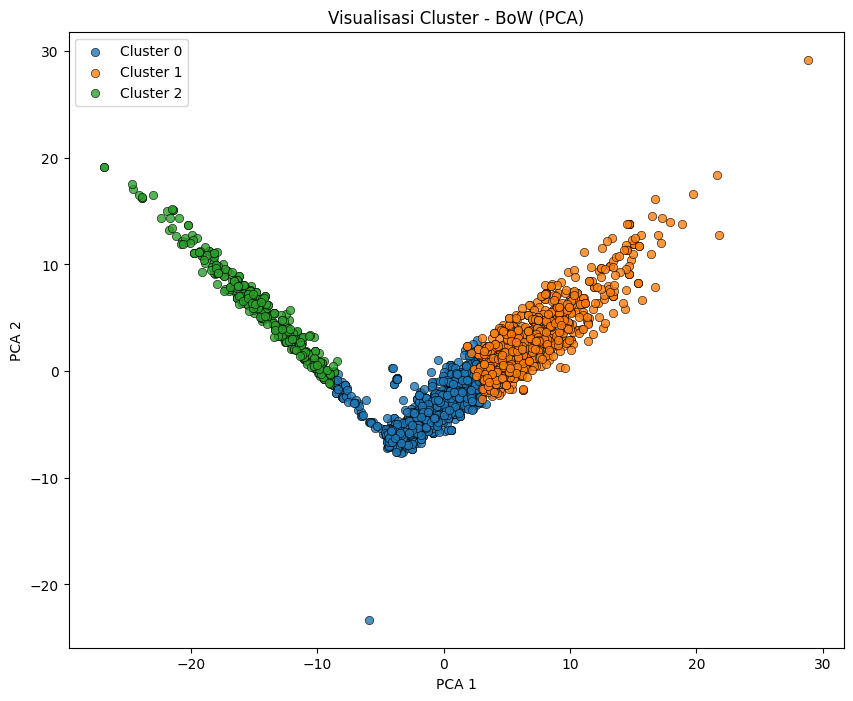

In [ ]:
# Dimensionality Reduction dengan PCA
X_bow_array = X_bow.toarray()  # Konversi BoW ke array
pca = PCA(n_components=2)
X_bow_2d = pca.fit_transform(X_bow_array)

# Visualisasi hasil clustering BoW
plt.figure(figsize=(10, 8))
for cluster in range(k):
    points = X_bow_2d[df['cluster_bow'] == cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}', edgecolors='black', linewidth=0.5, alpha=0.8)

plt.title("Visualisasi Cluster - BoW (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


Top Words in Cluster 0 (BoW): [('aku', 4945), ('ra', 3133), ('ati', 3022), ('mung', 2765), ('kow', 2675), ('dadi', 1985), ('tres', 1980), ('neng', 1829), ('sliramu', 1828), ('yang', 1806)]


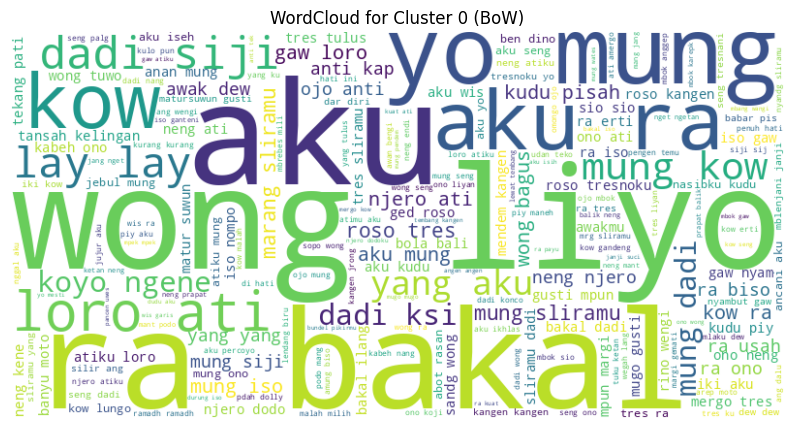

In [ ]:
#Cluster 1

cluster_0_indices = df[df['cluster_bow'] == 0].index
cluster_0_lyrics = " ".join(df.loc[cluster_0_indices, 'Lirik'])

top_words = Counter(cluster_0_lyrics.split()).most_common(10)
print("Top Words in Cluster 0 (BoW):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_0_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 0 (BoW)")
plt.show()


Top Words in Cluster 1 (BoW): [('aku', 12110), ('kow', 6333), ('ra', 3398), ('ati', 2085), ('tres', 1901), ('yang', 1831), ('mung', 1730), ('atiku', 1635), ('neng', 1573), ('loro', 1384)]


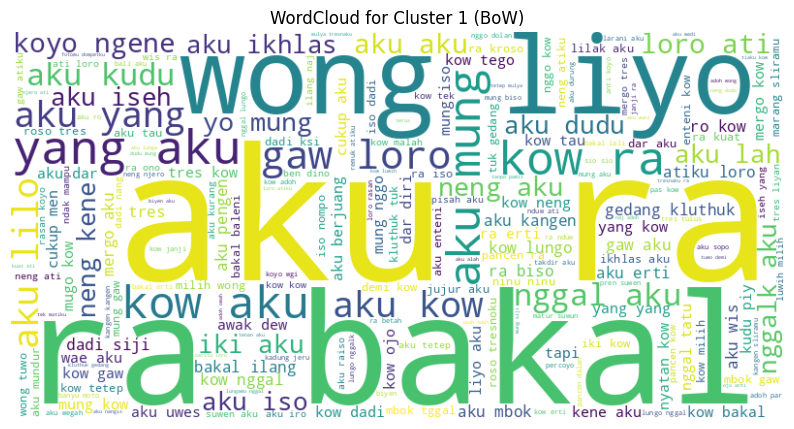

In [ ]:
cluster_1_indices = df[df['cluster_bow'] == 1].index
cluster_1_lyrics = " ".join(df.loc[cluster_1_indices, 'Lirik'])

top_words = Counter(cluster_1_lyrics.split()).most_common(10)
print("Top Words in Cluster 1 (BoW):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_1_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 1 (BoW)")
plt.show()


Top Words in Cluster 2 (BoW): [('riko', 3970), ('isun', 3113), ('sun', 2422), ('hang', 1959), ('welas', 1399), ('ati', 1367), ('biso', 966), ('nong', 935), ('mung', 812), ('roso', 781)]


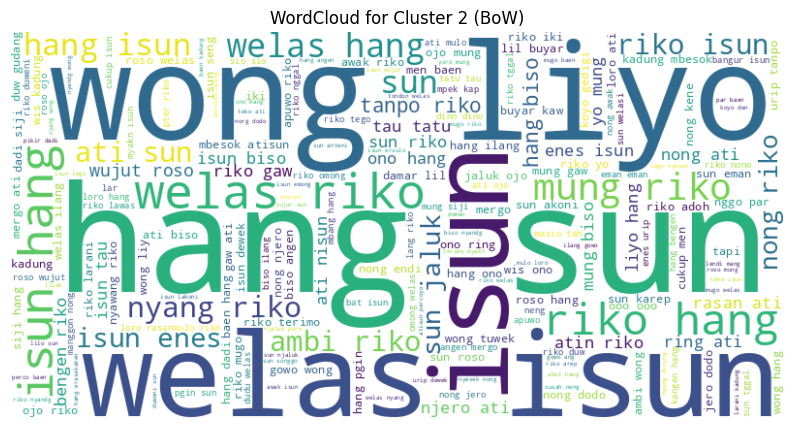

In [ ]:
cluster_2_indices = df[df['cluster_bow'] == 2].index
cluster_2_lyrics = " ".join(df.loc[cluster_2_indices, 'Lirik'])

top_words = Counter(cluster_2_lyrics.split()).most_common(10)
print("Top Words in Cluster 2 (BoW):", top_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_2_lyrics)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Cluster 2 (BoW)")
plt.show()
